In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [166]:
t_data=pd.read_csv('/content/tested.csv')

Data Pre-Processing

In [167]:
t_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [138]:
t_data.shape

(418, 12)

In [168]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [169]:
t_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [170]:
t_data=t_data.drop(columns='Cabin',axis=1)
t_data['Age'].fillna(t_data['Age'].mean(),inplace=True)
t_data['Fare'].fillna(t_data['Fare'].mean(),inplace=True)

In [171]:
t_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [172]:
t_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Data Visualization

In [144]:
sns.set()

In [145]:
t_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Distribution of Survival')

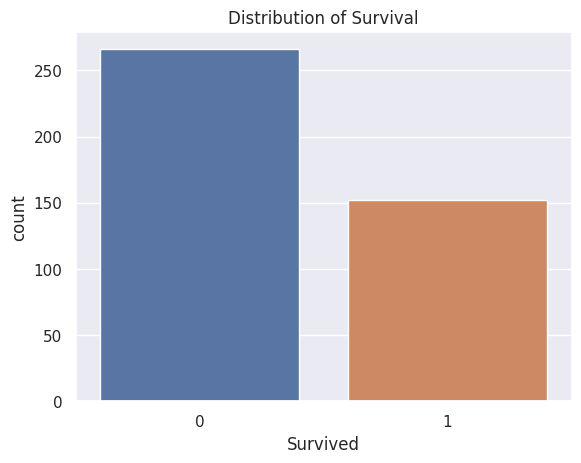

In [146]:
sns.countplot(x='Survived', data=t_data)
plt.title('Distribution of Survival')

In [147]:
t_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Distribution of Gender')

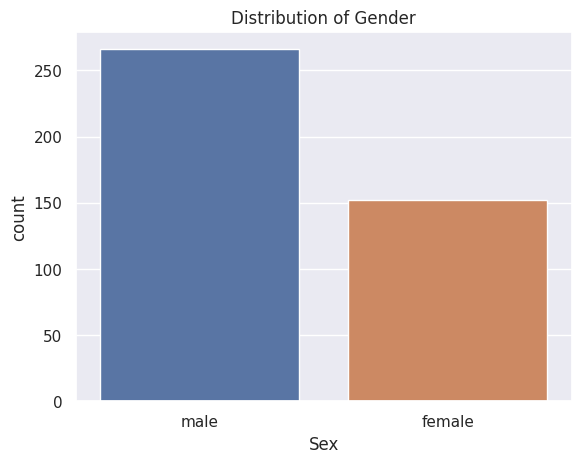

In [148]:
sns.countplot(x='Sex', data=t_data)
plt.title('Distribution of Gender')

Text(0.5, 1.0, 'Survival by Gender')

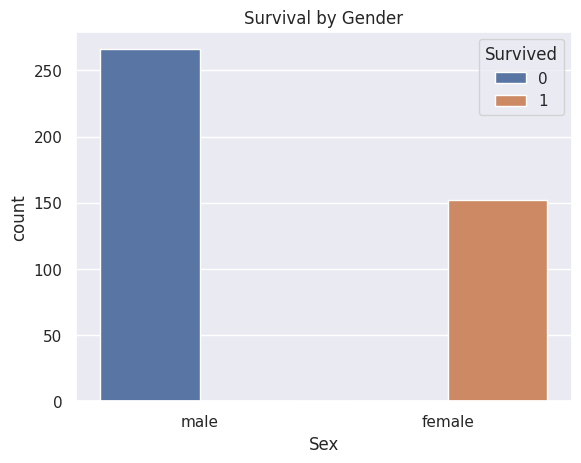

In [150]:
sns.countplot(x='Sex',hue='Survived',data=t_data)
plt.title("Survival by Gender")

Text(0.5, 1.0, 'Age Distribution')

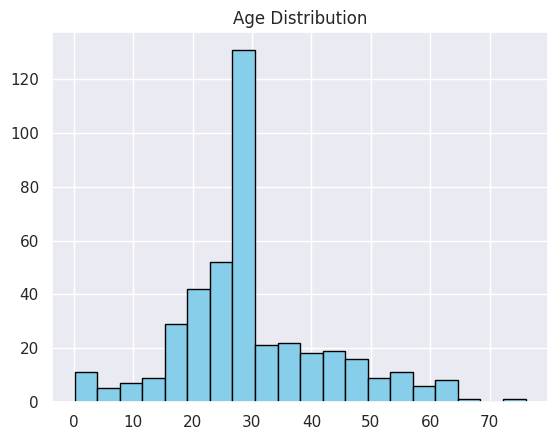

In [151]:
plt.hist(t_data['Age'], bins=20,edgecolor='black', color='skyblue')
plt.title("Age Distribution")

In [152]:
t_data['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

Text(0.5, 1.0, 'Distribution of Passenger Classes')

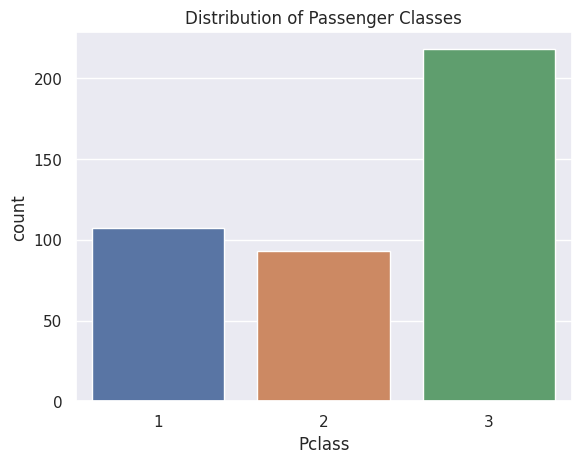

In [153]:
sns.countplot(x='Pclass', data=t_data)
plt.title('Distribution of Passenger Classes')

Text(0.5, 1.0, 'Survival by Passenger Class')

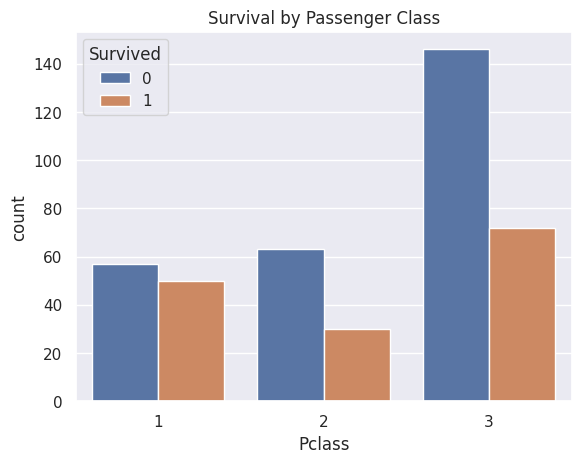

In [154]:
sns.countplot(x='Pclass', hue='Survived', data=t_data)
plt.title("Survival by Passenger Class")

In [155]:
t_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

Splitting train and test data

In [156]:
x=t_data.drop(columns= ['PassengerId','Name','Ticket','Survived'],axis=1)
y=t_data['Survived']

In [157]:
print(x)
print(y)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]
0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [158]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Logistic Regression Model

In [159]:
model=LogisticRegression()

In [160]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [161]:
x_train_pred=model.predict(x_train)
print(x_train_pred)

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0
 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0
 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1
 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0
 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0
 0]


In [162]:
training_accuracy=accuracy_score(y_train,x_train_pred)
print('Accuracy score of training data is:',training_accuracy)

Accuracy score of training data is: 1.0


In [163]:
x_test_pred=model.predict(x_test)
print(x_test_pred)

[0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 1 0 0 1 0 1]


In [164]:
test_accuracy=accuracy_score(y_test,x_test_pred)
print('Accuracy score of testing data is:',test_accuracy)

Accuracy score of testing data is: 1.0


The accuracy is measured to be 100%